In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib for saving
# Restart kernel after installing 
!pip install joblib

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [4]:
df = pd.read_csv("data/ml_compile.csv")

In [5]:
df.columns

Index(['year_month', 'land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent', 'bear_rsf_mean', 'bear_rsf_var'],
      dtype='object')

In [9]:
df.head()

,year_month,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,bear_rsf_mean,bear_rsf_var
0,1900-01,1.461,7.193,-4.102,13.142,-1.518,-1.265,-1.211,NaN,NaN,NaN,NaN
1,1900-02,3.098,9.181,-2.814,13.777,-0.312,-0.007,-0.054,NaN,NaN,NaN,NaN
2,1900-03,5.492,11.377,-0.680,14.400,-0.036,0.353,0.407,NaN,NaN,NaN,NaN
3,1900-04,8.223,13.972,2.131,15.170,-0.531,-0.343,-0.077,NaN,NaN,NaN,NaN
4,1900-05,11.385,17.415,5.179,15.955,-0.233,0.416,0.375,NaN,NaN,NaN,NaN


In [7]:
#Change Threshold to 9
df_drop_null = df.dropna(axis=0)

In [10]:
df_drop_null.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,bear_rsf_mean,bear_rsf_var
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,9.385082,15.100323,3.750175,15.712589,0.880915,0.782644,0.798637,372.225619,11.357481,15.851405,3.050767
std,4.121994,4.236401,3.995320,1.225211,0.496381,0.535807,0.511061,16.649756,3.220250,2.392539,1.089249
min,2.710000,8.095000,-2.768000,13.566000,-0.531000,-0.800000,-0.668000,343.130000,3.565600,6.093212,0.000000
25%,5.552000,11.217500,-0.155000,14.511000,0.583000,0.419000,0.450000,356.145000,8.513177,14.928223,2.430938
50%,9.618000,15.529000,3.987000,15.811000,0.902000,0.787000,0.791000,372.250000,12.016400,16.396830,2.959421
75%,13.443000,19.230500,7.743500,16.884000,1.182500,1.137500,1.116000,386.235000,14.326682,17.470912,3.635628
max,15.482000,21.320000,9.715000,17.611000,2.554000,2.465000,2.510000,403.960000,16.050143,20.000000,6.027518


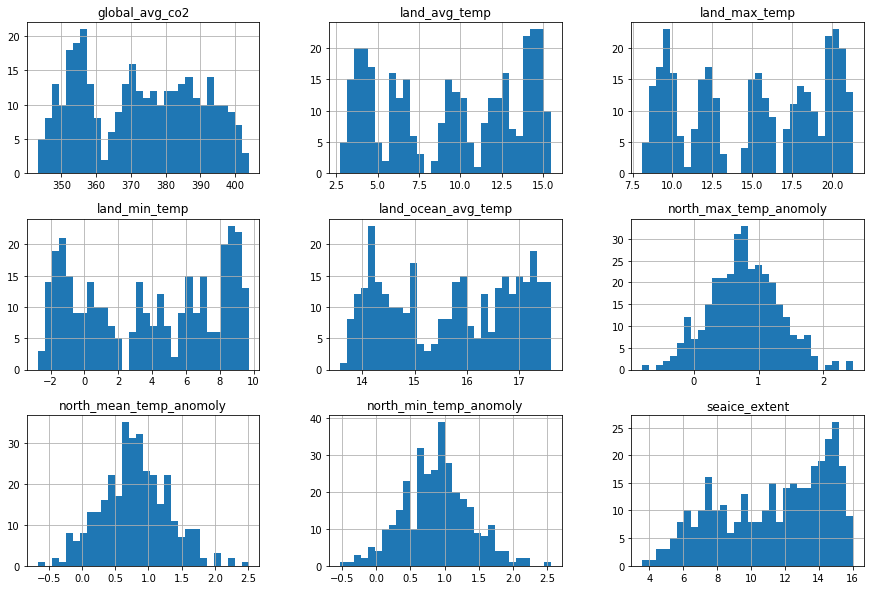

In [11]:
import seaborn as sns
import pandas as pd
numerical = ['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']
df_drop_null[numerical].hist(bins=30, figsize=(15, 10), layout=(3, 3));

# Preprocessing the Data

## Assign X(features) and y(target) data

In [12]:
X = df_drop_null[['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']]
y_rsf = df_drop_null["bear_rsf_mean"].values.reshape(-1, 1)
y_var = df_drop_null["bear_rsf_var"].values.reshape(-1, 1)
print(X.shape, y_rsf.shape)

(331, 9) (331, 1)


## Split the data into testing and training dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_rsf_train, y_rsf_test = train_test_split(X, y_rsf, test_size=0.2, random_state=42)
# X_train, X_test, y_var_train, y_var_test = train_test_split(X, y_var, test_size=0.2, random_state=42)

## MinMaxScalar to fit and transform X features and y target

In [14]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_rsf_minmax = MinMaxScaler().fit(y_rsf_train)
y_var_minmax = MinMaxScaler().fit(y_var_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

#Target value #1
y_rsf_train_minmax = y_rsf_minmax.transform(y_rsf_train)
y_rsf_test_minmax = y_rsf_minmax.transform(y_rsf_test)

#Target value #2
y_var_train_minmax = y_var_minmax.transform(y_var_train)
y_var_test_minmax = y_var_minmax.transform(y_var_test)

# Linear Regression Analysis

## RSF

In [15]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_minmax, y_rsf_train_minmax)

LinearRegression()

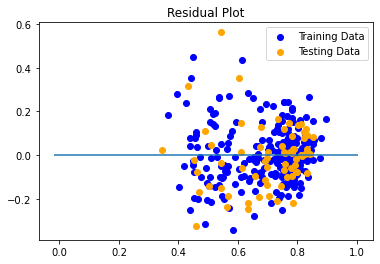

In [16]:
# Make Prediction using a FIT model and plot ==SEE BELOW FOR ALTERNATIVES==
predictions = model.predict(X_test_minmax)
model.fit(X_train_minmax, y_rsf_train_minmax)

plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_rsf_train_minmax, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_rsf_test_minmax, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_rsf_test_minmax.min(), xmax=y_rsf_test_minmax.max())
plt.title("Residual Plot")
plt.show()

In [17]:
# Validate the Model with MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_rsf_test_minmax, predictions)
r2 = model.score(X_test_minmax, y_rsf_test_minmax)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.021368190908656506, R2: 0.37455271251727373


## RSF variability

In [18]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_minmax, y_var_train_minmax)

LinearRegression()

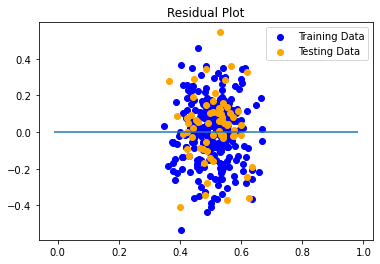

In [19]:
predictions = model.predict(X_test_minmax)
model.fit(X_train_minmax, y_var_train_minmax)

plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_var_train_minmax, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_var_test_minmax, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_var_test_minmax.min(), xmax=y_var_test_minmax.max())
plt.title("Residual Plot")
plt.show()

In [20]:
# Validate the Model with MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_var_test_minmax, predictions)
r2 = model.score(X_test_minmax, y_var_test_minmax)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03142772673578154, R2: 0.08579100406692552


## Preprocessing - Transform RSF values to Categorical

In [42]:
df["bear_rsf_mean"].fillna(0, inplace=True)

In [43]:
conditions = [(df["bear_rsf_mean"] < 6), (df["bear_rsf_mean"] > 6) & (df["bear_rsf_mean"] < 10), (df["bear_rsf_mean"] > 10) & (df["bear_rsf_mean"] < 15), (df["bear_rsf_mean"]>15)]
values = ['unknown','low', 'mid', 'high']
df["bear_mean_cat"] = np.select(conditions,values)

In [44]:
df.head()

,year_month,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,bear_rsf_mean,bear_rsf_var,bear_mean_cat
0,1900-01,1.461,7.193,-4.102,13.142,-1.518,-1.265,-1.211,NaN,NaN,0.0,NaN,unknown
1,1900-02,3.098,9.181,-2.814,13.777,-0.312,-0.007,-0.054,NaN,NaN,0.0,NaN,unknown
2,1900-03,5.492,11.377,-0.680,14.400,-0.036,0.353,0.407,NaN,NaN,0.0,NaN,unknown
3,1900-04,8.223,13.972,2.131,15.170,-0.531,-0.343,-0.077,NaN,NaN,0.0,NaN,unknown
4,1900-05,11.385,17.415,5.179,15.955,-0.233,0.416,0.375,NaN,NaN,0.0,NaN,unknown


In [45]:
df["bear_mean_cat"].unique()

array(['unknown', 'high', 'mid', 'low'], dtype=object)

In [54]:
#Change Threshold to 9
df_cat_null = df [['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent','bear_mean_cat']]

In [57]:
df_cat_null = df_cat_null.dropna(axis=0, how="any")

In [58]:
df_cat_null.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,9.226651,14.930488,3.615477,15.641613,0.775022,0.659465,0.686273,366.108054,11.559153
std,4.134906,4.249913,4.010169,1.229699,0.528649,0.567605,0.540999,18.908570,3.185538
min,2.558000,8.071000,-2.853000,13.566000,-0.787000,-1.256000,-1.065000,332.410000,3.565600
25%,5.189000,10.696000,-0.308000,14.441000,0.413500,0.253000,0.289000,350.320000,8.842585
50%,9.394000,15.174000,3.759000,15.683000,0.766000,0.653000,0.671000,364.310000,12.199871
75%,13.185500,19.062000,7.447000,16.801500,1.101500,1.037000,1.029500,382.250000,14.409063
max,15.482000,21.320000,9.715000,17.611000,2.554000,2.465000,2.510000,403.960000,16.341938


## Assign new variables

In [84]:
X = df_cat_null[['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']]
y_cat = df_cat_null["bear_mean_cat"]
print(X.shape, y_cat.shape)

(447, 9) (447,)


## Split the data into testing and training dataset

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_cat, test_size=0.5, random_state=42)

## MinMaxScalar to fit and transform X features and y target

In [86]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Logistic Regression Analysis

## RSF Category

In [87]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_minmax, y_cat_train)
print(f"Training Data Score: {classifier.score(X_train, y_cat_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_cat_test)}")

Training Data Score: 0.18834080717488788
Testing Data Score: 0.15625


# Random Forest Analysis

## RSF Category

In [91]:
from sklearn.ensemble import RandomForestClassifier
y_cat_rf = df_cat_null["bear_mean_cat"]

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_minmax, y_cat_train)
score = rf.score(X_test_minmax, y_cat_test)


In [92]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.2964087182895357, 'global_avg_co2'),
 (0.18043965307326035, 'seaice_extent'),
 (0.09278135377875361, 'north_max_temp_anomoly'),
 (0.08075695589190385, 'north_mean_temp_anomoly'),
 (0.0785872321824017, 'north_min_temp_anomoly'),
 (0.07021741601119753, 'land_ocean_avg_temp'),
 (0.06975109188328299, 'land_min_temp'),
 (0.06903660750349662, 'land_max_temp'),
 (0.0620209713861675, 'land_avg_temp')]

In [93]:
print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.75


## hypertune the model

In [94]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [114]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 650, 1100, 1550, 2000]}


### Label encoding y_cat

In [115]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_cat_train)
encoded_y_train = label_encoder.transform(y_cat_train)
encoded_y_test = label_encoder.transform(y_cat_test)

In [116]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_minmax, encoded_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 60, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=2)

In [117]:
rf_random.best_params_

{'n_estimators': 1550,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [122]:
rf2 = RandomForestClassifier(n_estimators=200, min_samples_split =5, min_samples_leaf = 4, max_features='auto', max_depth=60, bootstrap='True')
rf2 = rf2.fit(X_train_minmax, encoded_y_train)
score = rf2.score(X_test_minmax, encoded_y_test)

print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.75
